# Example

In [ ]:
import micropip
await micropip.install('../packages/sympy-1.14.dev0-py3-none-any.whl')
#takes a while


===================== Structure Summary =====================

Reaction Loads:
R_v   [11.00,-1.00]  (14.00)             = -55.0000000000000
T     [11.00,-1.00]  (14.00)             = -435
R_h   [11.00,-1.00]  (14.00)             = -15.0000000000000

Points of Interest - Bending Moment:
bending_moment at [x.xx,y.yy]  (0.00)    = 0
bending_moment at [x.xx,y.yy]  (4.00)    = -80
bending_moment at [x.xx,y.yy]  (9.00)    = -330
bending_moment at [x.xx,y.yy]  (14.00)-  = -434.999979000000

Points of Interest - Shear Force:
shear_force at [x.xx,y.yy]  (0.00+)      = 0
shear_force at [x.xx,y.yy]  (2.00-)      = -11.9999940000000
shear_force at [x.xx,y.yy]  (2.00+)      = -28
shear_force at [x.xx,y.yy]  (4.00-)      = -39.9999940000000
shear_force at [x.xx,y.yy]  (4.00+)      = -41
shear_force at [x.xx,y.yy]  (9.00-)      = -53.0000000000000
shear_force at [x.xx,y.yy]  (9.00+)      = -21
shear_force at [x.xx,y.yy]  (14.00-)     = -21.0000000000000


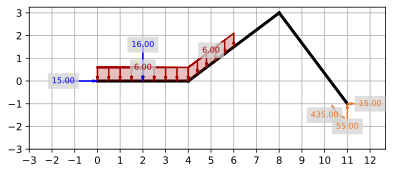

In [3]:
from sympy.physics.continuum_mechanics.structure2d import Structure2d
%config InlineBackend.figure_format = 'svg'

E = 3e4
I = 1
A = 1e4
s = Structure2d()
s.add_member(x1=0, y1=0, x2=4 , y2=0 , E=E, I=I, A=A)
s.add_member(x1=4, y1=0, x2=8 , y2=3 , E=E, I=I, A=A)
s.add_member(x1=8, y1=3, x2=11, y2=-1, E=E, I=I, A=A)
Rv, Rh, T = s.apply_support(x=11, y=-1, type="fixed")
s.apply_load(start_x=0, start_y=0, value=15, global_angle=0 , order=-1)
s.apply_load(start_x=2, start_y=0, value=16, global_angle=270, order=-1)
s.apply_load( start_x=0, start_y=0, value=6, global_angle=270, order=0, end_x=4, end_y=0, )
s.apply_load( start_x=4, start_y=0, value=6, global_angle=270, order=0, end_x=6, end_y=1.5, )
s.solve_for_reaction_loads(Rv, Rh, T)
s.summary(round_digits=None)
s.draw(show_load_values=True)